<a href="https://colab.research.google.com/github/Usman-Alii/FYP/blob/AlexNet2-FYP/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting  Google Drive

In [63]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [64]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import cv2
#from PIL import Image

In [65]:
Xtrain = np.ndarray(shape = (1864,227,227)) #1564 + 500 + 1000
Ytrain = np.zeros(1864)

#Xval = np.ndarray(shape = (500,227,227)) #1564 + 500 + 1000
#Yval = np.zeros(500)

Xtest = np.ndarray(shape = (1200,227,227)) #1564 + 500 + 1000
Ytest = np.zeros(1200)

train_count = 0
test_count= 0
val_count = 0

In [66]:
i = 1
while i <3065:   
    if train_count < 1864:
        if i < 767:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor1.zip (Unzipped Files)/'
        elif i < 1533:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor3.zip (Unzipped Files)/'
        elif i < 2299:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor2.zip (Unzipped Files)/'
        else:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor4.zip (Unzipped Files)/'

        f = h5py.File(path+str(i)+'.mat','r')
        gr = f.get('cjdata')
        im = np.array(gr.get('image'))
        norm_image = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) #for normalizing the images of dataset
        norm_image = cv2.resize(norm_image, (227,227), interpolation = cv2.INTER_AREA)
        Xtrain[train_count] = np.array(norm_image)
        Ytrain[train_count] = gr.get('label')[()]
        train_count +=1
        i+=1

    if test_count < 1200:
        if i < 767:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor1.zip (Unzipped Files)/'
        elif i < 1533:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor3.zip (Unzipped Files)/'
        elif i < 2299:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor2.zip (Unzipped Files)/'
        else:
          path = '/content/drive/MyDrive/TUMOR DATASET/tumor4.zip (Unzipped Files)/'

        f = h5py.File(path+str(i)+'.mat','r')
        gr = f.get('cjdata')
        im = np.array(gr.get('image'))
        norm_image = cv2.normalize(im, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) #for normalizing the images of dataset
        norm_image = cv2.resize(norm_image, (227,227), interpolation = cv2.INTER_AREA)

        Xtest[test_count] = np.array(norm_image)
        Ytest[test_count] = gr.get('label')[()]
        test_count +=1
        i+=1
    print(i)

#    print(np.max(norm_image))
#    plt.imshow(norm_image, cmap="gray") 
#  plt.show()
#    print((gr.get('label')[()])) #cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor

3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
101
103
105
107
109
111
113
115
117
119
121
123
125
127
129
131
133
135
137
139
141
143
145
147
149
151
153
155
157
159
161
163
165
167
169
171
173
175
177
179
181
183
185
187
189
191
193
195
197
199
201
203
205
207
209
211
213
215
217
219
221
223
225
227
229
231
233
235
237
239
241
243
245
247
249
251
253
255
257
259
261
263
265
267
269
271
273
275
277
279
281
283
285
287
289
291
293
295
297
299
301
303
305
307
309
311
313
315
317
319
321
323
325
327
329
331
333
335
337
339
341
343
345
347
349
351
353
355
357
359
361
363
365
367
369
371
373
375
377
379
381
383
385
387
389
391
393
395
397
399
401
403
405
407
409
411
413
415
417
419
421
423
425
427
429
431
433
435
437
439
441
443
445
447
449
451
453
455
457
459
461
463
465
467
469
471
473
475
477
479
481
483
485
487
489
491
493
495
497
499
501
503
505
507
509
511
513
515
517
519
521
523
525
527
5

In [67]:
#a,b,c = 0,0,0
#for i in range(0,500):
  #if Yval[i] == 1:
   # a+=1
  #elif Yval[i] == 2:
   # b+=1
  #elif Yval[i] == 3:
   # c+=1
#print(a,b,c)

In [68]:
a,b,c = 0,0,0
for i in range(0,1864):
  if Ytrain[i] == 1:
    a+=1
  elif Ytrain[i] == 2:
    b+=1
  elif Ytrain[i] == 3:
    c+=1
print(a,b,c)

355 1044 465


In [69]:
a,b,c = 0,0,0
for i in range(0,1200):
  if Ytest[i] == 1:
    a+=1
  elif Ytest[i] == 2:
    b+=1
  elif Ytest[i] == 3:
    c+=1
print(a,b,c)

353 382 465


Reshaping data

In [70]:
Xtrain = Xtrain.reshape(Xtrain.shape[0],227,227,1)
#Xval = Xval.reshape(Xval.shape[0],32,32,1)
Xtest = Xtest.reshape(Xtest.shape[0],227,227,1)

Ytrain = Ytrain-1
#Yval = Yval - 1
Ytest = Ytest - 1

print(Ytrain.shape)
print(Ytrain)

(1864,)
[0. 0. 0. ... 1. 0. 0.]


Importing Tensorflow

In [71]:
import tensorflow as tf

In [72]:

# build a sequential model


cnnmodel = tf.keras.Sequential([
      #tf.keras.layers.Conv2D(6,(5,5),input_shape=(32,32,1),strides=(1,1),activation='tanh', padding="same"),
      #tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

      #tf.keras.layers.Conv2D(16,(5,5),strides=(1,1),activation='tanh', padding='valid'),
      #tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

      #tf.keras.layers.Flatten(),
      #tf.keras.layers.Dense(120, activation='tanh'),
      #tf.keras.layers.Dense(84, activation='tanh'),
      #tf.keras.layers.Dense(3, activation='softmax')


    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')

])

In [73]:
#0 for meningioma, 1 for glioma, 2 for pituitary tumor
cn = ['meningioma','glioma', 'pituitary']
cnnmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 55, 55, 96)        11712     
_________________________________________________________________
batch_normalization_10 (Batc (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 384)      

In [74]:
# to shuffle the data
from sklearn.utils import shuffle
Xtrain, Ytrain = shuffle(Xtrain, Ytrain)

In [75]:
# log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# # Specify the callback object
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [76]:
print(Ytrain)

[2. 1. 1. ... 1. 2. 1.]


In [77]:
# compile model
cnnmodel.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# fit on data for 30 epochs
history = cnnmodel.fit(Xtrain, tf.keras.utils.to_categorical(Ytrain),epochs=20, validation_split=0.33, batch_size=10)

Epoch 1/20
125/125 [==============================] - 4s 28ms/step - loss: 21.8771 - accuracy: 0.5745 - val_loss: 8.8608 - val_accuracy: 0.2987
Epoch 2/20
125/125 [==============================] - 3s 26ms/step - loss: 1.7116 - accuracy: 0.6350 - val_loss: 9.7977 - val_accuracy: 0.2516
Epoch 3/20
125/125 [==============================] - 3s 26ms/step - loss: 0.8760 - accuracy: 0.7137 - val_loss: 1.1229 - val_accuracy: 0.7208
Epoch 4/20
125/125 [==============================] - 3s 26ms/step - loss: 0.9118 - accuracy: 0.7083 - val_loss: 1.0461 - val_accuracy: 0.7646
Epoch 5/20
125/125 [==============================] - 3s 26ms/step - loss: 0.6797 - accuracy: 0.7436 - val_loss: 0.5961 - val_accuracy: 0.7906
Epoch 6/20
125/125 [==============================] - 3s 26ms/step - loss: 0.6608 - accuracy: 0.7589 - val_loss: 14.4113 - val_accuracy: 0.4692
Epoch 7/20
125/125 [==============================] - 3s 26ms/step - loss: 1.0619 - accuracy: 0.7051 - val_loss: 0.6924 - val_accuracy: 0.77

In [78]:
tf.keras.utils.to_categorical(Ytrain).shape

(1864, 3)

In [79]:
np.unique(Ytrain)

array([0., 1., 2.])

In [80]:
y_pred = cnnmodel.predict(Xtest)

In [81]:

prediction = tf.math.argmax(y_pred, axis=1)
equality = tf.math.equal(prediction, Ytest)
accuracy = tf.math.reduce_mean(tf.cast(equality, tf.float32))

In [82]:
print(accuracy)

tf.Tensor(0.8591667, shape=(), dtype=float32)


In [83]:
cn[np.argmax(y_pred[140])]

'meningioma'

In [84]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


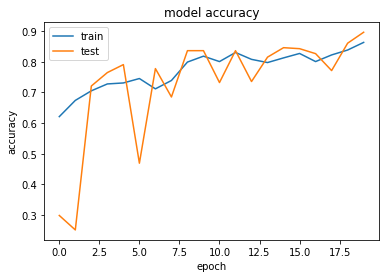

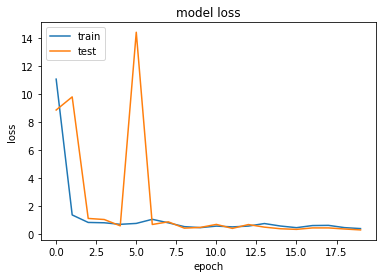

In [85]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
# retrieve weights from the second hidden layer
# filters = cnnmodel.layers[0].get_config()
# print(filters)
# for i in range(3):
#   b = cnnmodel.layers[i].count_params()
#   print(b)


In [87]:
# layer_names = [layer.name for layer in cnnmodel.layers]
# layer_names

# layer_outputs = [layer.output for layer in cnnmodel.layers]
# layer_outputs

In [88]:

# model = tf.keras.models.Model(inputs=cnnmodel.inputs, outputs=cnnmodel.layers[1].output)
# model.summary()

In [89]:
# img = np.expand_dims(Xtest[40], axis=0)
# #Xtest[40].shape
# feature_maps = model.predict(img)

In [90]:
# plot all 64 maps in an 8x8 squares
# square = 8
# ix = 1
# for _ in range(square):
# 	for _ in range(4):
# 		# specify subplot and turn of axis
# 		ax = plt.subplot(square, square, ix)
# 		ax.set_xticks([])
# 		ax.set_yticks([])
# 		# plot filter channel in grayscale
# 		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
# 		ix += 1
# # show the figure
# plt.show()

In [91]:
for layer in cnnmodel.layers:
    if 'conv' in layer.name:
      print(layer.name)

conv2d_10
conv2d_11
conv2d_12
conv2d_13
conv2d_14


In [92]:
def displayfmaps(imagex):
  img = np.expand_dims(imagex, axis=0)
  for xlayer in cnnmodel.layers:
    if 'conv' not in xlayer.name:
      continue
    model = tf.keras.models.Model(inputs=cnnmodel.inputs, outputs=xlayer.output)
    feature_maps = model.predict(img)
    square = 8
    ix = 1
    for _ in range(square):
      for _ in range(4):
        if(feature_maps[:,:,:].shape > (100,)):
          ix +=50
      # specify subplot and turn of axis
        ax = plt.subplot(square, 10, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
  # show the figure
    plt.show()

In [93]:
#displaying Features (Function Call)
#displayfmaps(Xtest[150])